#Regression & Its Evaluation | Assignment

Question 1: What is Simple Linear Regression?

Definition:

Simple Linear Regression fits a straight line through a set of data points to model the relationship between X and Y.

The equation of the line is:

      Y=b0​+b1​X

Where:
Y = predicted value

X = input value

b₀ = intercept (value of Y when X = 0)

b₁ = slope (how much Y changes when X increases by 1 unit)

Purpose:

To predict future values

To find the strength of the relationship between X and Y

To understand trends

Example:

Predicting house price (Y) from house size (X).

If larger houses usually cost more, the regression line will slope upward.

Question 2: What are the key assumptions of Simple Linear Regression?

1. Linearity

The relationship between the independent variable (X) and dependent variable (Y) must be linear.
It should form a roughly straight-line pattern.

2. Independence of Errors

The residuals (errors) should be independent of each other.
No pattern should exist in the error terms (important in time-series data).

3. Homoscedasticity

The residuals must have constant variance across all values of X.
In simple words: the spread of errors should be same throughout, not increasing or decreasing.

4. Normality of Errors

Residuals should be normally distributed.
This is important for hypothesis testing and confidence intervals.

5. No Significant Outliers

Outliers can distort the slope and intercept, reducing accuracy.

6. X Should Not Be Measured With Large Errors

The independent variable (X) should be relatively accurate.
(Regression assumes the error is mainly in Y.)

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

Definition:

-  A regression model has heteroscedasticity when:

      Var(εi​)=constant

-  This violates a key assumption of linear regression.

Example (Easy to understand):

- Imagine you predict house prices using area.
- For small houses → prediction errors are small
- For large houses → prediction errors become large

This changing spread of errors is heteroscedasticity.

It important to address because:
- It makes the model’s predictions unreliable
- It affects statistical tests
- It affects model efficiency
- It may indicate model problems

Question 4: What is Multiple Linear Regression?

Definition:

Multiple Linear Regression models the relationship between one dependent variable and multiple independent variables by fitting a straight plane (hyperplane) through the data.

The equation is:

 Y=b0​+b1​X1​+b2​X2​+⋯+bn​Xn​

 Where:

Y = dependent variable (the outcome we want to predict)

X₁, X₂, …, Xₙ = independent variables

b₀ = intercept

b₁, b₂, …, bₙ = coefficients (show how each X affects Y)

Question 5: What is polynomial regression, and how does it differ from linear regression?

Definition:

Polynomial Regression fits a curved line (non-linear relationship) to the data by introducing polynomial terms like:

| Aspect               | Linear Regression           | Polynomial Regression             |
| -------------------- | --------------------------- | --------------------------------- |
| Shape of model       | Straight line               | Curved line                       |
| Equation form        | ( Y = b_0 + b_1X )          | ( Y = b_0 + b_1X + b_2X^2 + ... ) |
| Type of relationship | Linear                      | Non-linear                        |
| Flexibility          | Less flexible               | More flexible                     |
| When used            | Data follows straight trend | Data shows curvature              |


Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

Slope (b1): 1.98
Intercept (b0): 0.18
Predicted Y values: [ 2.16  4.14  6.12  8.1  10.08]


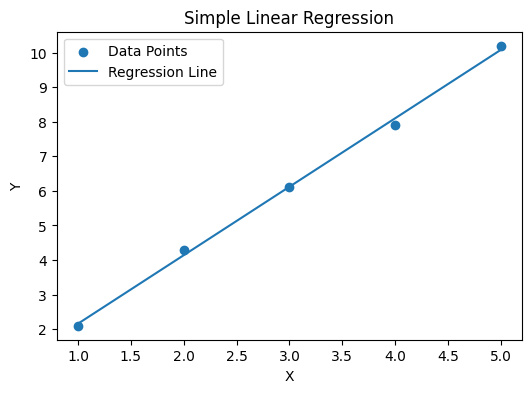

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit Simple Linear Regression
coeffs = np.polyfit(X, Y, 1)
slope, intercept = coeffs

print("Slope (b1):", slope)
print("Intercept (b0):", intercept)

# Predictions
Y_pred = slope * X + intercept
print("Predicted Y values:", Y_pred)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="Data Points")
plt.plot(X, Y_pred, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.

In [2]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):             0.0377
Time:                        11:46:37   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.



Polynomial Regression Equation:
Y = 0.060 + (1.940)*X + (0.200)*X^2


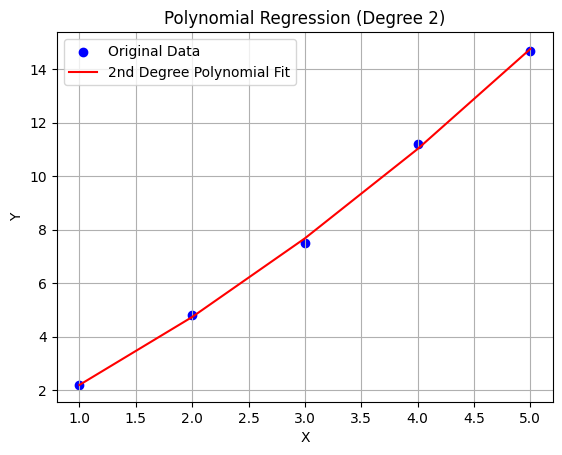

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform the features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Display coefficients
print("Polynomial Regression Equation:")
print(f"Y = {model.intercept_:.3f} + ({model.coef_[1]:.3f})*X + ({model.coef_[2]:.3f})*X^2")

# Plot the original data and polynomial regression curve
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_pred, color='red', label='2nd Degree Polynomial Fit')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

Regression Equation:
Y = 6.50 + (1.15)*X


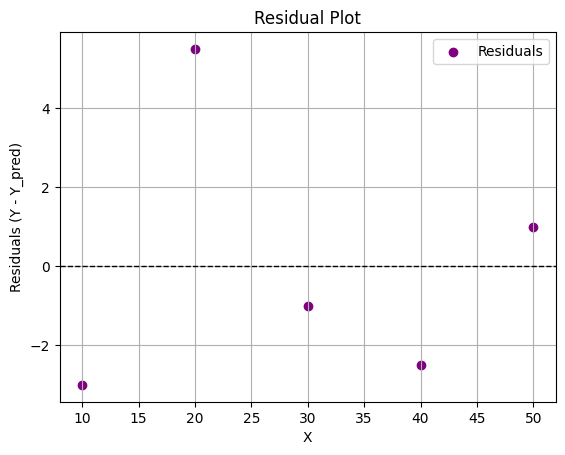


Residuals for each data point:
X=10, Residual=-3.00
X=20, Residual=5.50
X=30, Residual=-1.00
X=40, Residual=-2.50
X=50, Residual=1.00


In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Display model equation
print("Regression Equation:")
print(f"Y = {model.intercept_:.2f} + ({model.coef_[0]:.2f})*X")

# Create residual plot
plt.scatter(X, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("X")
plt.ylabel("Residuals (Y - Y_pred)")
plt.legend()
plt.grid(True)
plt.show()

# Print residuals
print("\nResiduals for each data point:")
for i in range(len(X)):
    print(f"X={X[i][0]}, Residual={residuals[i]:.2f}")


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.

Answer:

As a data scientist building a house price prediction model using features such as area, number of rooms, and location, encountering heteroscedasticity and multicollinearity indicates issues with model reliability and coefficient interpretation.
Here’s how I would address both:

| Issue              | Detection                         | Solutions                                   |
| ------------------ | --------------------------------- | ------------------------------------------- |
| Heteroscedasticity | Residual plot, Breusch–Pagan test | Log transformation, WLS, robust SE          |
| Multicollinearity  | VIF > 10, correlation matrix      | Drop variables, PCA, Ridge/Lasso regression |
